## PART 1

In [109]:
#Part 1.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state

trainfile = pd.read_csv("/content/titanic_train.csv")
testfile = pd.read_csv("/content/titanic_test.csv")

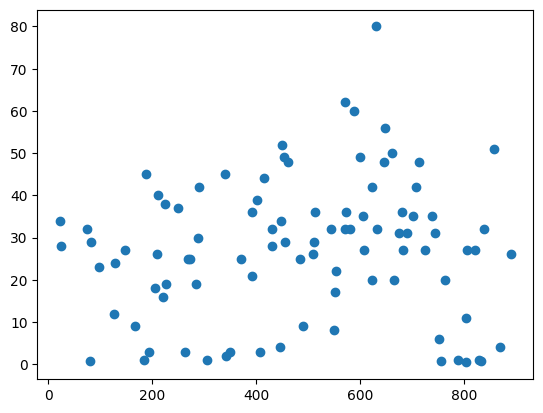

In [90]:
#Part 1.2

MaleDf = trainfile[(trainfile.Sex == 'male')]
FemaleDf = trainfile[(trainfile.Sex == 'female')]

MaleSurvivedDf = MaleDf[(MaleDf.Survived == 1)]

plt.scatter(MaleSurvivedDf["PassengerId"], MaleSurvivedDf["Age"])
plt.show()
%matplotlib inline

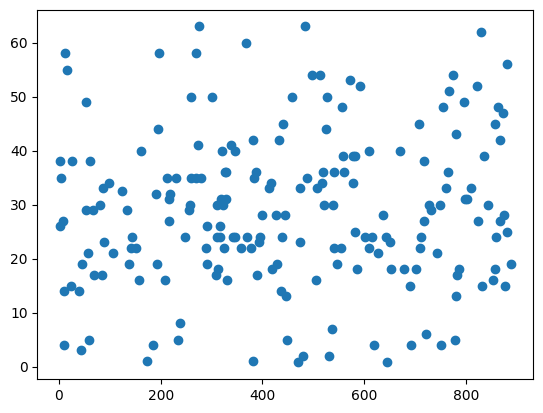

In [86]:
FemaleSurvivedDf = FemaleDf[(FemaleDf.Survived == 1)]

plt.scatter(FemaleSurvivedDf["PassengerId"], FemaleSurvivedDf["Age"])
plt.show()
%matplotlib inline

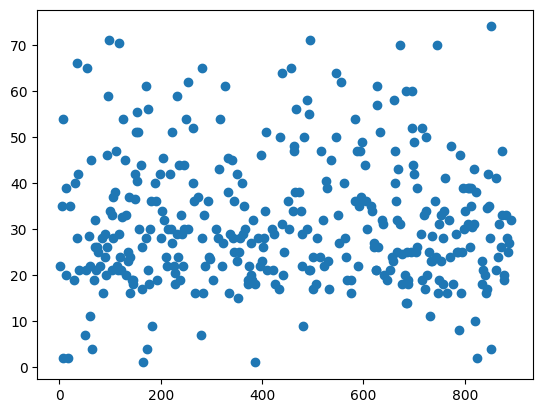

In [94]:
MaleNotSurvivedDf = MaleDf[(MaleDf.Survived == 0)]

plt.scatter(MaleNotSurvivedDf["PassengerId"], MaleNotSurvivedDf["Age"])
plt.show()
%matplotlib inline

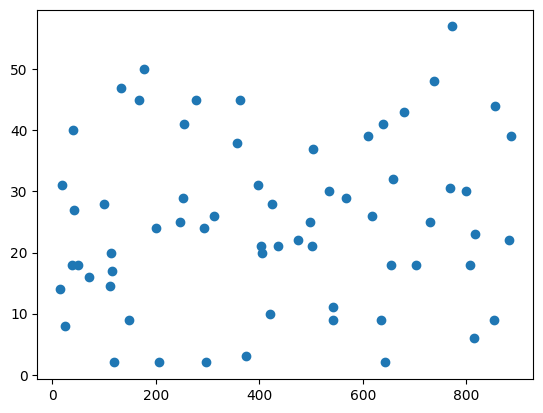

In [95]:
FemaleNotSurvivedDf = FemaleDf[(FemaleDf.Survived == 0)]

plt.scatter(FemaleNotSurvivedDf["PassengerId"], FemaleNotSurvivedDf["Age"])
plt.show()
%matplotlib inline

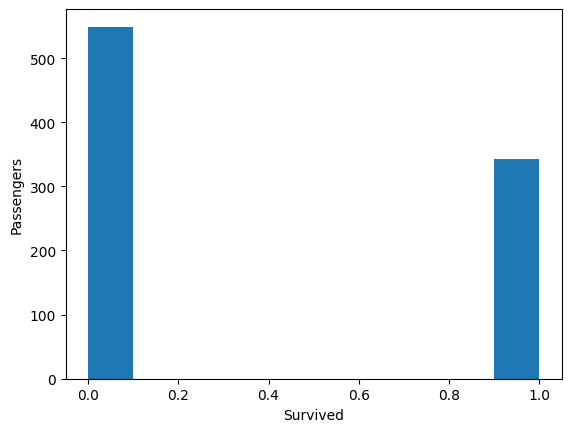

In [106]:
Survival = trainfile["Survived"].plot(kind='hist')
Survival.set_xlabel("Survived")
Survival.set_ylabel("Passengers")
plt.show()
%matplotlib inline

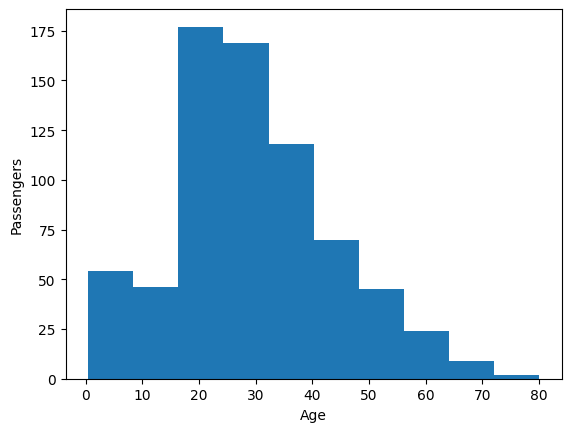

In [107]:
Survival = trainfile["Age"].plot(kind='hist')
Survival.set_xlabel("Age")
Survival.set_ylabel("Passengers")
plt.show()
%matplotlib inline

In [ ]:
#Part 1.3



## PART 2

In [19]:
#Code No.1

import pandas as pd

training = pd.read_csv("/content/titanic_train.csv")

In [20]:
#Code No.2

training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
#Code No.3

training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
#Code No.4

training["Gender"] = training["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [23]:
#Code No.5

training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
#Code No.6

training["Age"].fillna(training["Age"].mean(), inplace=True)

In [25]:
#Code No.7

training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Gender       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [28]:
#Value that is replaced to the missing ages

print(training["Age"].mean())

29.69911764705882


In [29]:
#Code No.8

y_target = training["Survived"].values

In [30]:
#Code No.9

columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
X_input = training[list(columns)].values

In [31]:
#Code No.10

from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf_train = clf_train.fit(X_input, y_target)

In [46]:
#Code No.11

score = clf_train.score(X_input,y_target)
print(round(score*100, 2),"%")

82.27 %


In [ ]:
#Code No.12

from sklearn.externals.six import StringIO


In [ ]:
#Code No.13
